In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation

from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

![](img/penguins.png)

In [2]:
penguins = pd.read_csv('https://raw.githubusercontent.com/HOGENT-ML/course/main/datasets/penguins.csv')
penguins.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


Get some general info about the dataset (type of each column, null values, ...)

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


In [4]:
penguins[penguins.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


Drop rows containing NaN values.  
Check afterwards if there are no nulls left.

In [5]:
penguins=penguins.dropna()
penguins[penguins.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species


Is this a skewed dataset?

In [6]:
penguins['Species'].value_counts()

Species
0    151
1    123
2     68
Name: count, dtype: int64

Show the correlation matrix between all attributes and the label. 

array([[<Axes: xlabel='CulmenLength', ylabel='CulmenLength'>,
        <Axes: xlabel='CulmenDepth', ylabel='CulmenLength'>,
        <Axes: xlabel='FlipperLength', ylabel='CulmenLength'>,
        <Axes: xlabel='BodyMass', ylabel='CulmenLength'>,
        <Axes: xlabel='Species', ylabel='CulmenLength'>],
       [<Axes: xlabel='CulmenLength', ylabel='CulmenDepth'>,
        <Axes: xlabel='CulmenDepth', ylabel='CulmenDepth'>,
        <Axes: xlabel='FlipperLength', ylabel='CulmenDepth'>,
        <Axes: xlabel='BodyMass', ylabel='CulmenDepth'>,
        <Axes: xlabel='Species', ylabel='CulmenDepth'>],
       [<Axes: xlabel='CulmenLength', ylabel='FlipperLength'>,
        <Axes: xlabel='CulmenDepth', ylabel='FlipperLength'>,
        <Axes: xlabel='FlipperLength', ylabel='FlipperLength'>,
        <Axes: xlabel='BodyMass', ylabel='FlipperLength'>,
        <Axes: xlabel='Species', ylabel='FlipperLength'>],
       [<Axes: xlabel='CulmenLength', ylabel='BodyMass'>,
        <Axes: xlabel='CulmenDepth',

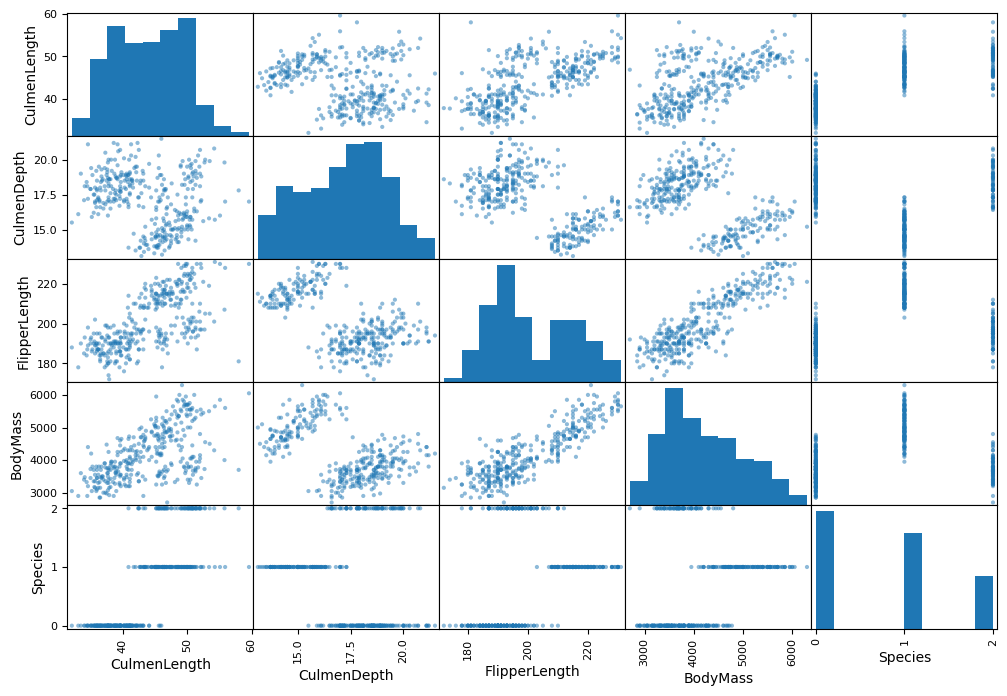

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(penguins, figsize=(12, 8))

What is X and what is y?

In [8]:
X = penguins.drop("Species", axis = 1)
y = penguins['Species']  

What is X_train, y_train, X_test, y_test?

In [9]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  

What is the number of records in X_train en X_test?

In [10]:
print(f"The number of records in X_train is: {len(X_train)}")
print(f"The number of records in X_test is: {len(X_test)}")

The number of records in X_train is: 256
The number of records in X_test is: 86


Train a decision tree without any restrictions. 
- what's the depth of the resulting tree (check the documentation)
- find a way to check if this model suffers from overfitting

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
print(f'Tree depth: {tree_clf.get_depth()}')
print(f'Accuracy on training set: {tree_clf.score(X_train, y_train)}')
print(f'Accuracy on test set: {tree_clf.score(X_test, y_test)}')


Tree depth: 5
Accuracy on training set: 1.0
Accuracy on test set: 0.9651162790697675


Try to improve this result by using GridSearchCV to find the best parameter combination.  
Which parameters does the DecisionTreeClassifier have? See [sklearn.tree.DecisionTreeClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Then use GridSearchCV to find the best values for the parameters when using the DecisionTreeClassifier.  

What is the best model (a.o. tree depth) and the best score?

In [12]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ["gini", "entropy"],
    'max_depth': [1,2,3,4,5,6,7,8,9],
    'min_samples_split': (0.01, 0.02, 0.03, 0.04, 0.05,0.1,0.2, 0.3,0.4)
}

In [ ]:
grid_clf = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid, scoring='accuracy', cv=3)

grid_clf.fit(X_train,y_train)

# best estimator
print(f"best estimator = {grid_clf.best_estimator_}")
# best score
print(f"best score = {grid_clf.best_score_}")



best estimator = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=0.01,
                       random_state=42)
best score = 0.9765617875057


Visualize the best tree.

In [19]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os

tree_clf = grid_clf.best_estimator_
# Visualize the decision tree

IMAGES_PATH = "."

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "penguin.dot"),
        feature_names=X.columns,
        class_names=['0','1','2'],
        rounded=True,
        filled=True
    )


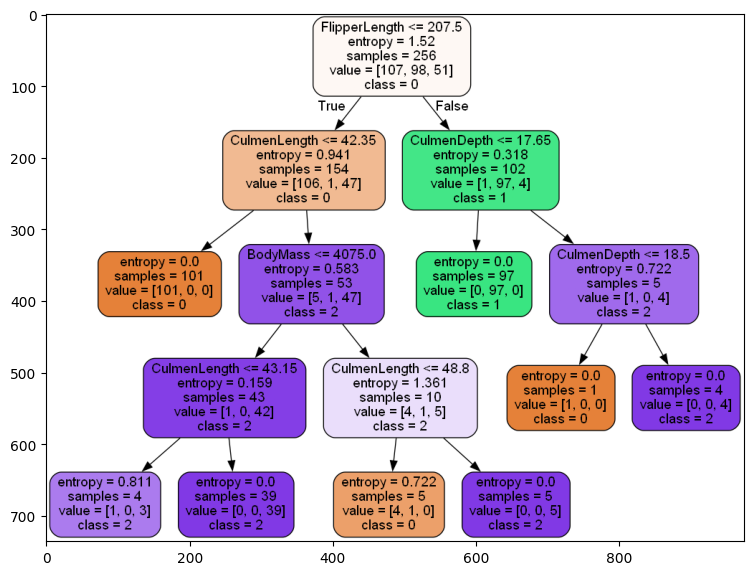

In [22]:
os.system('dot -Tpng penguin.dot -o penguin.png')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(9,9))
img = mpimg.imread('penguin.png')
imgplot = plt.imshow(img)
plt.show()

- Check if this model corresponds with the parameters of the best estimator

Use the best model to make predictions on X_test.    
Determine the accuracy on the test set.   
Show the normalized confusion matrix on the test set.

In [14]:
from sklearn.metrics import accuracy_score

best_model = grid_clf.best_estimator_
y_pred = best_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9418604651162791


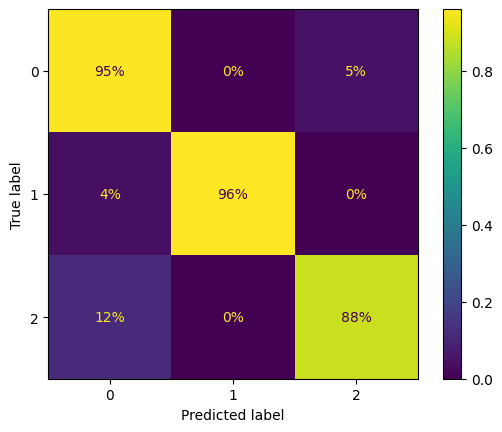

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        normalize="true", values_format=".0%")
plt.show()

Find the probabilities for each prediction on the test set.  

In [27]:
y_scores = best_model.predict_proba(X_test)
print (y_scores)

[[0.   1.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.8  0.2  0.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.8  0.2  0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.8  0.2  0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.8  0.2  0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   1. 